#Relatório 3 - Cálculo Numérico Computacional
##Nome: Guilherme Dallmann Lima
##Matricula: 19200035
##Turma: T2

#Importando as Bibliotecas

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sympy import *
import time
x = Symbol('x')
values = []

#Metodos

0.   Grafico de Dispersão
1.   Lagrange
2.   Forma de Newton
3.   Spline Cubica Natural
4.   MMQ - Linear - Quadrados Minimos



## Gráfico de dispersão

In [ ]:
def scatter_plot(x_values, y_values, title="", x_label="", y_label="", color=""):
    # plotar o gráfico de dispersão
    plt.scatter(x_values, y_values, c=color)

    # definir títulos e rótulos dos eixos
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # exibir o gráfico
    plt.show()

##Lagrange

In [ ]:
def polinomioLagrange(m, x, y, z):
  Pz = 0
  for i in range(m):
    c = 1
    d = 1
    for j in range(m):
      if i != j:
        c = c * (z-x[j])
        d = d * (x[i] - x[j])

    Pz = Pz + y[i] * (c/d)

  return Pz

##Forma de Newton

In [ ]:
def calculoDiferenca(x, y):
    """
    Calcula as diferenças divididas de Newton para os pontos de entrada
    """
    n = len(x)
    F = [[0 for i in range(n)]
         for j in range(n)]  # matriz de diferenças divididas iniciais
    for i in range(n):
        F[i][0] = y[i]  # inicializa a primeira coluna com os valores de y
    for j in range(1, n):
        for i in range(n - j):
            F[i][j] = (F[i + 1][j - 1] - F[i][j - 1]) / (x[i + j] - x[i])
    return F[0]  #


def newton_interpolation(x, y,z):
    n = len(x)
    F = [[0 for i in range(n)]
         for j in range(n)]  # matriz de diferenças divididas iniciais
    for i in range(n):
        F[i][0] = y[i]  # inicializa a primeira coluna com os valores de y
    for j in range(1, n):
        for i in range(n - j):
            F[i][j] = (F[i + 1][j - 1] - F[i][j - 1]) / (x[i + j] - x[i])
    a = calculoDiferenca(x, y)
    n = len(x) - 1  # grau do polinômio interpolador
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (z - x[n - k]) * p
    return p

##Spline Cubica Natural

In [ ]:
def splineCubicaNatural(cordX, cordY, grau):
    n = len(cordY)
    a = np.copy(cordY)
    b = np.zeros(n-1)
    d = np.zeros(n-1)
    h = np.zeros(n-1)

    for i in range(n-1):
        h[i] = cordX[i+1] - cordX[i]

    A = np.zeros((n, n))
    A[0, 0] = 1
    A[n-1, n-1] = 1

    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]

    B = np.zeros(n)

    for i in range(1, n-1):
        B[i] = 3 * ((a[i+1] - a[i])/h[i] - (a[i] - a[i-1])/h[i-1])

    c = np.linalg.solve(A, B)

    for i in range(n-1):
        b[i] = (a[i+1] - a[i])/h[i] - (h[i]/3) * (2*c[i] + c[i+1])
        d[i] = (c[i+1] - c[i]) / (3 * h[i])

    for i in range(n-1):
        if(grau-1 == i):
          f = lambda x, j=i: d[j] * ((x - cordX[j])**3) + c[j] * ((x - cordX[j])**2) + b[j] * (x - cordX[j]) + a[j]
          return f


##MMQ - Linear

In [ ]:
def aproximacaoLinear(x, y, n):
  sumx = 0
  sumxy = 0
  st = 0
  sumy = 0
  sumx2 = 0
  sr = 0
  syx = 0
  r2 = 0
  a1 = 0
  a0 = 0
  for i in range(n):
    sumx = sumx + x[i]
    sumy = sumy + y[i]
    sumxy = sumxy + (x[i] * y[i])
    sumx2 = sumx2 + (x[i]*x[i])
  xm = sumx / n
  ym = sumy / n
  a1 = ((n*sumxy) - (sumx * sumy)) / ((n*sumx2) - (sumx*sumx))
  a0 = ym - (a1 * xm)

  for i in range(n):
    st = st + (y[i] - ym)**2
    sr = sr + (y[i] - (a1 * x[i]) - a0)**2
  syx = (sr/(n -2))**0.5
  r2 = (st - sr)/ st
  return syx, r2

##MMQ - Quadrados Minimos

In [ ]:
def mmq(x, y, dim):
  m = len(x)
  A = np.empty((dim, dim))
  b = np.empty((dim))
  soma = []
  for i in range(0, dim+2):
    aux = 0
    for k in range(0, m):
      aux = aux + x[k]**i
    soma.append(aux)

  for i in range(0, dim):
    for j in range(0, dim):
      A[i][j] = soma[i+j]
      if (i != j):
        A[j, i] = A[i, j]

  b = []
  for i in range(0, dim):
    aux = 0
    for j in range(0, m):
      aux = aux + y[j]*(x[j]**i)
    b.append(aux)
  return A, b


#Questões

##1.Você mediu a queda de tensão V através de um resistor para diversos valores  diferentes de corrente i. Os resultados são:
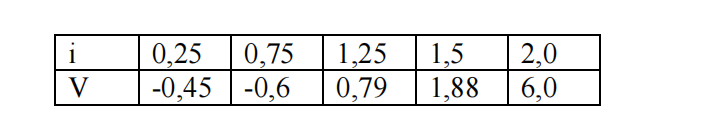


##Use interpolação polinomial (Método de Lagrange ou Método de Newton) de  primeiro a quarto grau para fazer uma estimativa da queda de tensão para i = 1,15. Interprete os resultados.

In [ ]:

vectorOrd1 = np.array([0.25, 0.75, 1.25, 1.5, 2.0], dtype="double")

vectorOrd2 = np.array([-0.45, -0.6, 0.79, 1.88, 6.0], dtype="double")

i = 1.15

for w in range(1, 5):
  result = polinomioLagrange(w, vectorOrd1, vectorOrd2, i)
  print("A estimativa para queda de tensão é de: ", result)

A estimativa para queda de tensão é de:  -0.45
A estimativa para queda de tensão é de:  -0.72
A estimativa para queda de tensão é de:  0.3887999999999997
A estimativa para queda de tensão é de:  0.41683199999999987


***Método de Lagrange***

***R: A estimativa para queda de tensão utilizando a interpolação polinomial de primeiro grau é de:  -0.45***

***R: A estimativa para queda de tensão utilizando a interpolação polinomial de segundo grau é de:  -0.72***

***R: A estimativa para queda de tensão utilizando a interpolação polinomial de terceiro grau é de:  0.3887999999999997***

***R: A estimativa para queda de tensão utilizando a interpolação polinomial de quarto grau é de:  0.41683199999999987***

##2.Os dados a seguir definem a concentração de oxigênio dissolvido na água fresca em função da temperatura no nível do mar:
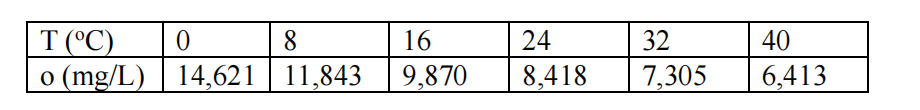


###a) Estime o(27) utilizando polinômio de grau 1, polinômio de grau 5 e Spline Cúbica Natural.



In [ ]:
vectorOrd1 = np.array([0, 8, 16, 24, 32, 40], dtype="double")

vectorOrd2 = np.array([14.621,11.843, 9.870, 8.418, 7.305, 6.413], dtype="double")
o = 27



result = polinomioLagrange(1, vectorOrd1, vectorOrd2, o)

print("Lagrange Polinômio de Grau 1: ", result)

result = polinomioLagrange(5, vectorOrd1, vectorOrd2, o)

print("Lagrange Polinômio de Grau 5: ", result)

splineCubic = splineCubicaNatural(vectorOrd1, vectorOrd2, 4)

print("Spline Cubica: ", splineCubic(o))

Lagrange Polinômio de Grau 1:  14.621
Lagrange Polinômio de Grau 5:  7.967420959472656
Spline Cubica:  7.965708872233851


***R: Utilizando o método de Lagrange para o Polinômio de Grau 1, obteve-se o valor de: 14.621.***

***R: Utilizando o método de Lagrange para o Polinômio de Grau 5, obteve-se o valor de: 7.967420959472656.***

***R: Utilizando o método da Spline Cubica Natural, obteve-se o valor de: 7.965708872233851***

###b) Comparar os resultados obtidos na letras a com o resultado exato que é 7,986 mg/L

***O método de interpolação de Lagrange é uma técnica para encontrar um polinômio que passe por um conjunto de pontos dados. Ele usa uma combinação linear de polinômios de grau menor para criar um polinômio que passa exatamente por cada ponto.***

***Por outro lado, a Spline Cúbica Natural é uma técnica de interpolação que usa uma combinação de polinômios de terceiro grau (cúbicos) para aproximar uma curva suave por um conjunto de pontos dados. A spline cúbica natural é uma técnica muito útil porque produz uma curva suave que é fácil de calcular e não é afetada por oscilações abruptas nos dados.***

***Se os dados a serem interpolados não contiverem flutuações abruptas, o método de Lagrange pode produzir uma aproximação muito precisa. No entanto, se os dados contiverem flutuações abruptas, a spline cúbica natural pode produzir uma aproximação mais suave e precisa do que o método de Lagrange, porque ela leva em consideração a suavidade da curva ao invés de simplesmente passar pelos pontos exatos.***


***R: O resultado que mais se aproximou do valor real foi o método de Lagrange para o Polinômio de Grau 5, devido aos dados serem suaves.***

##3. A distância necessária para parar um automóvel consiste nas componentes tanto de pensar como de frear, cada uma delas sendo uma função de sua velocidade. Os seguintes dados experimentais foram coletados para quantificar essa relação.
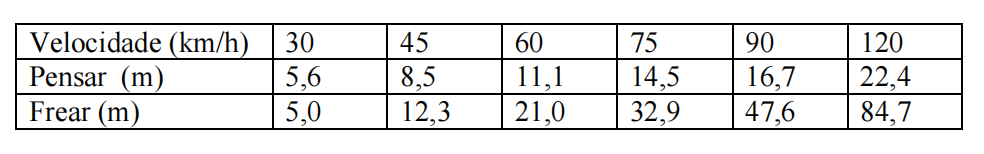

###a) Faça o diagrama da dispersão dos dados para encontrar a equação do melhor ajuste para as componentes de pensar e frear.

DISPERSÃO PENSAR
A =  0.18647619047619027
B =  0.0800000000000182


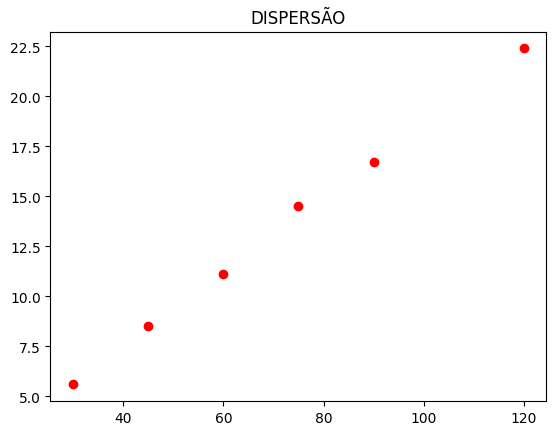



DISPERSÃO FREAR
A =  0.005878306878306839
B =  0.0009206349206410708
C =  -0.09500000000020743


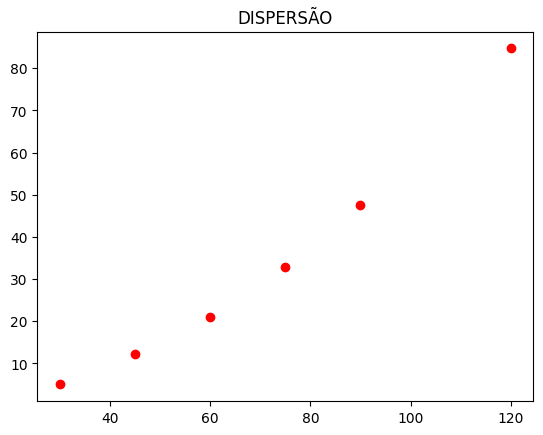

In [ ]:
velocidade = np.array([30, 45, 60, 75, 90, 120], dtype="double")
pensar = np.array([5.6, 8.5, 11.1, 14.5, 16.7, 22.4], dtype="double")
frear = np.array([5.0, 12.3, 21.0, 32.9, 47.6, 84.7], dtype="double")

print("DISPERSÃO PENSAR")
A, b = mmq(velocidade, pensar, 2)
coeficiente = np.linalg.solve(A,b)
print("A = ",coeficiente[1])
print("B = ",coeficiente[0])
scatter_plot(velocidade, pensar, title="DISPERSÃO", x_label="", y_label="", color="Red")
print("")
print("")

print("DISPERSÃO FREAR")
A, b = mmq(velocidade, frear, 3)
coeficiente = np.linalg.solve(A,b)
print("A = ",coeficiente[2])
print("B = ",coeficiente[1])
print("C = ",coeficiente[0])

scatter_plot(velocidade, frear, title="DISPERSÃO", x_label="", y_label="", color="Red")

***R: Os dados referente a Pensar, possui o comportamento reta, no qual descreve a relação linear entre as coordenadas de Velocidade e Pensar, onde a melhor equação para descrever o comportamento dos dados é dado por:***

\begin{align}
f(x) = a x + b
\end{align}

***Fazendo a substituição dos valores na equação após obter-se os dados utilizando o método MMQ, se da por:***

a =  0.18647619047619027 \\
b =  0.0800000000000182

\begin{align}
f(x) =  0.18647619047619027x + 0.0800000000000182
\end{align}



***R: Os dados referente a Frear, possui o comportamento de parabola, no qual descreve a relação não linear entre as coordenadas de Velocidade e Frea, onde a melhor equação para descrever o comportamento dos dados é dado por:***

\begin{align}
f(x) = ax^2 + bx + c
\end{align}

***Fazendo a substituição dos valores na equação após obter-se os dados utilizando o método MMQ, se da por:***

a =  0.005878306878306839 \\
b =  0.0009206349206410708 \\
c = -0.09500000000020743

\begin{align}
f(x) = 0.005878306878306839 x^2 + 0.0009206349206410708 x + (-0.09500000000020743)
\end{align}

###b) Utilize essa equação para fazer uma estimativa da distância de parada total para um carro que está se movendo a 110 km/h.

In [ ]:
movimento = 110.0

velocidade = np.array([30, 45, 60, 75, 90, 120], dtype="double")
pensar = np.array([5.6, 8.5, 11.1, 14.5, 16.7, 22.4], dtype="double")
frear = np.array([5.0, 12.3, 21.0, 32.9, 47.6, 84.7], dtype="double")

print("DIPERSÃO PENSAR")
A, b = mmq(velocidade, pensar, 2)
coeficiente = np.linalg.solve(A,b)
print("A = ",coeficiente[1])
print("B = ",coeficiente[0])

resultPensar = (coeficiente[1] * movimento) + coeficiente[0]
print(resultPensar)

print("")
print("")

print("DIPERSÃO FREAR")
A, b = mmq(velocidade, frear, 3)
coeficiente = np.linalg.solve(A,b)
print("A = ",coeficiente[2])
print("B = ",coeficiente[1])
print("C = ",coeficiente[0])

resultFrear = coeficiente[2] * movimento**2 + coeficiente[1] * movimento + coeficiente[0]

print(resultFrear)
print("")
print("")

print("Total:")
print(resultFrear + resultPensar)

DIPERSÃO PENSAR
A =  0.18647619047619027
B =  0.0800000000000182
20.59238095238095


DIPERSÃO FREAR
A =  0.005878306878306839
B =  0.0009206349206410708
C =  -0.09500000000020743
71.13378306878306


Total:
91.72616402116401


***R: Para um carro que está se movendo a 110Km/h a estimativa da distancia de parada para pensar é de:***

***20.59238095238095***


***R: Para um carro que está se movendo a 110Km/h a estimativa da distancia de parada para Frear é de:***

***71.13378306878306***

***R: Totalizando a estimativa da distancia de parada se da por: 91.72616402116401***

##4. Os dados a seguir representam o crescimento bacteriológico em uma cultura líquida durante certo número de dias:
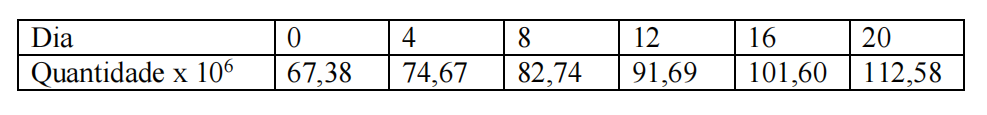

###a) Faça o diagrama da dispersão dos dados para encontrar a equação do melhor ajuste para a tendência dos dados

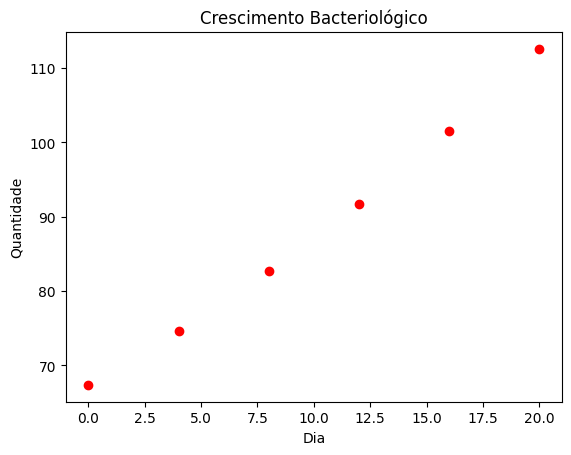

In [ ]:
dia = [0, 4, 8, 12, 16, 20]
quantidade = [67.38, 74.67, 82.74, 91.69, 101.60, 112.58]
scatter_plot(dia, quantidade, title="Crescimento Bacteriológico", x_label="Dia", y_label="Quantidade", color="Red")

***R: Devido ao comportamento Linear do gráfico acima, é possível determinar que a melhor equação, se da por y = ax + b.***

***Onde a é o coeficiente angular (inclinação da reta) e b é o coeficiente linear (intercepto da reta). x é a variável independente e y é a variável dependente.***

###b) Verifique que uma curva para se ajustar ao diagrama de dispersão é do tipo linear, quadrática e exponencial

A =  2.2552857142857112
B =  65.89047619047624


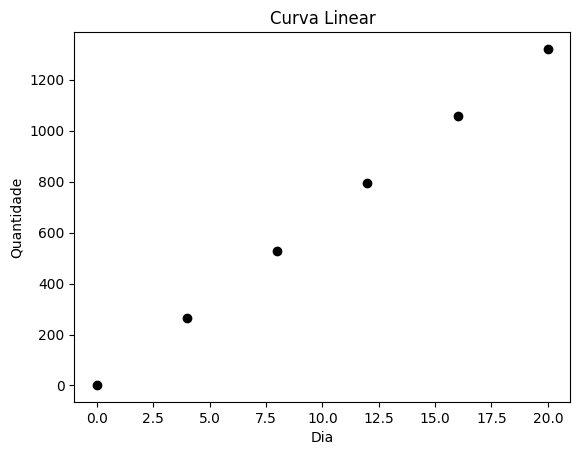





A =  1.6791696428571066
B =  67.42678571428586
C =  0.02880580357143019


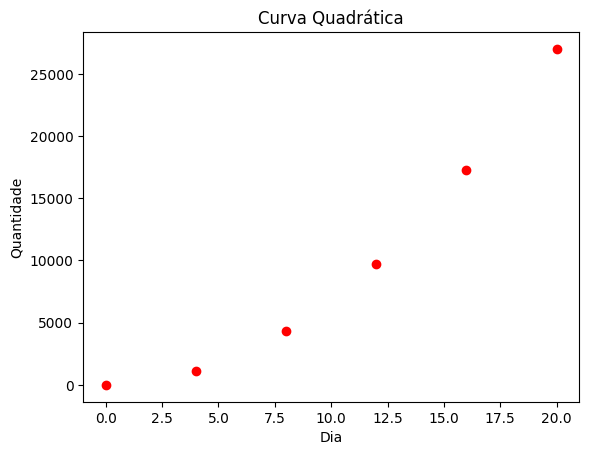





A =  0.025665605440044433
B =  4.210385735816448


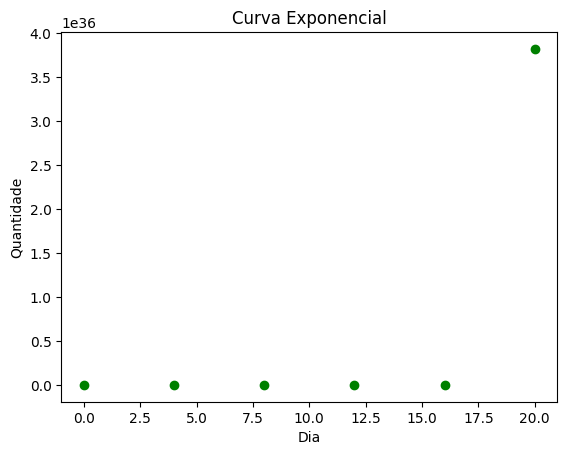

In [ ]:
dia = [0, 4, 8, 12, 16, 20]
quantidade = [67.38, 74.67, 82.74, 91.69, 101.60, 112.58]

# Curva linear
A, b = mmq(dia, quantidade, 2)
coefLinear = np.linalg.solve(A,b)
print("A = ",coefLinear[1])
print("B = ",coefLinear[0])
coefLinear = np.polyval(coefLinear, dia)
scatter_plot(dia, coefLinear, title="Curva Linear", x_label="Dia", y_label="Quantidade", color="black")
print("\n\n\n")

# Curva quadrática
A, b = mmq(dia, quantidade, 3)
coefQuad = np.linalg.solve(A,b)
print("A = ",coefQuad[1])
print("B = ",coefQuad[0])
print("C = ",coefQuad[2])
coefQuad = np.polyval(coefQuad, dia)
scatter_plot(dia, coefQuad, title="Curva Quadrática", x_label="Dia", y_label="Quantidade", color="Red")
print("\n\n\n")
# Curva exponencial
A, b = mmq(dia, np.log(quantidade), 2)
coefExp = np.linalg.solve(A,b)
print("A = ",coefExp[1])
print("B = ",coefExp[0])
coefExp = np.exp(np.polyval(coefExp, dia))
scatter_plot(dia, coefExp, title="Curva Exponencial", x_label="Dia", y_label="Quantidade", color="Green")

***R: Devido a melhor equação ser, y = ax + b, pois possui um comportamento de reta, a melhor função é a Curva Linear, devido ao seu comportamento linear, conforme gráficos apresentados acima.***

###c) Ajuste os dados, usando o Método dos Mínimos Quadrados.

In [ ]:
dia = [0, 4, 8, 12, 16, 20]
quantidade = [67.38, 74.67, 82.74, 91.69, 101.60, 112.58]

A,b = mmq(dia, quantidade, 2)
coeficiente = np.linalg.solve(A,b)
print("A = ",coeficiente[1])
print("B = ",coeficiente[0])


A =  2.2552857142857112
B =  65.89047619047624


***R: Aplicando o método MMQ para ajustar os dados, obtem-se o A e o B:***
\begin{align}
A =  2.2552857142857112\\
B =  65.89047619047624
\end{align}


###d) Determine a melhor equação para prever a quantidade de bactérias após 30 dias.

A =  2.2552857142857112
B =  65.89047619047624



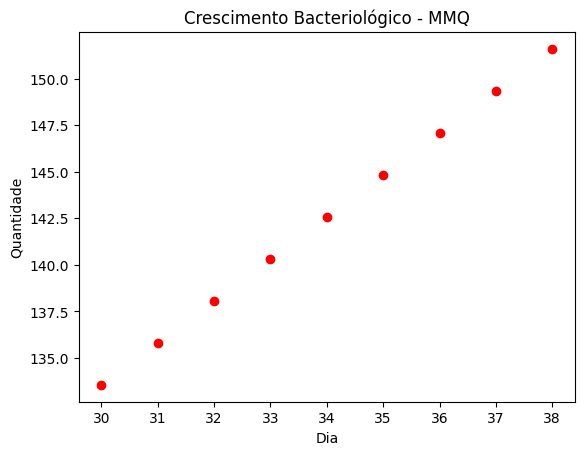

In [ ]:
dia = [0, 4, 8, 12, 16, 20]
quantidade = [67.38, 74.67, 82.74, 91.69, 101.60, 112.58]
A,b = mmq(dia, quantidade, 2)
coeficiente = np.linalg.solve(A,b)
print("A = ",coeficiente[1])
print("B = ",coeficiente[0])
print("")

valorFinal = []
dia = []
for dias in range(30, 39):
    valorFinal.append((coeficiente[1] * dias)+ coeficiente[0])
    dia.append(dias)

scatter_plot(dia, valorFinal, title="Crescimento Bacteriológico - MMQ", x_label="Dia", y_label="Quantidade", color="Red")

**R:** ***Regressão linear é uma técnica estatística utilizada para modelar a
relação entre uma variável dependente Y e uma ou mais variáveis independentes
X. É uma técnica de análise de regressão que busca estimar a relação funcional entre duas variáveis contínuas, com o objetivo de fazer previsões ou entender a natureza da relação entre as variáveis.***


***O modelo de regressão linear é baseado na equação de uma reta:***

\begin{align}
Y = ax + b
\end{align}


***Onde Y é a variável dependente, X é a variável independente, a é a intercepção da reta com o eixo Y, b é o coeficiente angular da reta, que indica a inclinação da reta, onde representa  valor previsto pela equação da reta.***



##5. Um investigador relatou os dados tabulados a seguir. Sabe-se que esse dados podem ser modelados pela seguinte equação

x = e**(y-b)/a

##onde  a e  b são parâmetros. Use  regressão não linear para determinar  a e b. Com base em sua análise, faça uma previsão de y em x = 2,6.

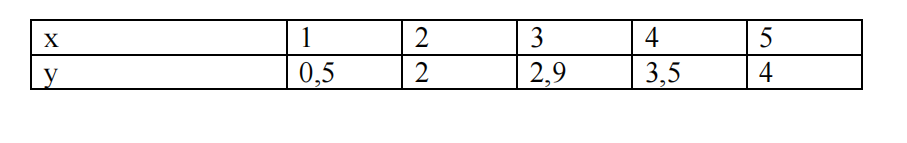

In [ ]:
x = np.array([1, 2, 3, 4, 5], dtype="double")
y = np.array([0.5, 2, 2.9, 3.5, 4], dtype="double")

logX = np.log(x)

A, b = mmq(logX, y, 2)
coeficiente = np.linalg.solve(A,b)
print("A = ",coeficiente[1])
print("B = ",coeficiente[0])

Y = coeficiente[1]+(coeficiente[0] * np.log(2.6))
print("Previsão de Y, para o X= 2,6 é de:", Y)

A =  2.1729168344126504
B =  0.499435719499467
Previsão de Y, para o X= 2,6 é de: 2.6501333804499034


***R: Podemos aplicar o método MMQ para estimar os parâmetros log(a) e b. Uma vez que os parâmetros foram estimados, podemos encontrar o valor de a utilizando a propriedade do logaritmo natural, obtendo os valores de A e B:***

\begin{align}
A = 2.1729168344126504\\
B = 0.499435719499467
\end{align}

***Após obter os valores de A e B, pode-se modelar os dados a partir da equação a seguir:***
\begin{align}
x = e^{(y-b)/a}
\end{align}

***Fazendo uma previsão de y em x = 2,6 utilizando a equação acima obtem-se o valor de:***
\begin{align}
Y = 2.5756826238735413
\end{align}
